In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import statistics
import random
import math

# PRESENT Sbox
S = [12,5,6,11,9,0,10,13,3,14,15,8,4,7,1,2]

In [3]:
#We first load data from the "random plaintext dataset", this set of traces will be used for our attack
file_no = 100
traces = []
plaintexts = []

for i in range(file_no):
    with open('../Assignment_materials/attack_traces/trace_'+str(i)+'.txt') as f:
        lines = f.read().splitlines()
        traces.append(lines)

with open('../Assignment_materials/attack_traces/plaintexts.txt') as f:
    plaintexts = f.read().splitlines()
    
trace_array = np.array(traces)
trace_array = trace_array.astype(float)

In [4]:
#extract the plaintext nibble
plaintext_array = []
for i in range(file_no):
    plaintext_array.append(int(plaintexts[i][15],16))#for recovering the 0th nibble
plaintext_array = np.array(plaintext_array)

#number of time samples in one trace in the random plaintext dataset
N = 5000

In [5]:
#compute the correlation coefficients for all time samples
def compute_corr_coeff():
    #store hypotheses of intermediate values
    iv = [[0 for x in range(file_no)] for y in range(16)] 

    for i in range(16): #for each key hypothesis
        for j in range(file_no): #for each plaintext
            pt = plaintext_array[j] # get the target nibble of the plaintext
            iv[i][j] = S[i^pt] #compute the hypotheses of intermediate values


    #store correlation coefficients for each time sample and each key hypothesis
    corr_coeff = [[0 for x in range(N)] for y in range(16)] 

    for t in range(N):
        for k in range(16): #for each key hypothesis
            #compute coefficient between the leakages at time sample t and the hypotheses
            corr_coeff[k][t] = np.corrcoef(trace_array[:,t],iv[k])[0][1]
    return corr_coeff

In [6]:
# Plot the correlation
def plot_corre(corr_coeff, correct_key):
    x = []
    
    for t in range(N):
        x.append(t)
        
    for k in range(16):
        if k == correct_key:
            plt.plot(x,corr_coeff[k],'b')
        else:
            plt.plot(x,corr_coeff[k],color="#808080")
        absolute_coefficients = []
        for t in range(N):
            absolute_coefficients.append(abs(corr_coeff[k][t]))
        #printing the correlation coefficients
        print("Maximum absolute correlation coefficient = " + str(max(absolute_coefficients)) + " for key hypothesis " + str(k) + " obtained at time sample " + str(absolute_coefficients.index(max(absolute_coefficients))))
    plt.show()
    
    return

In [7]:
corr_coeff = compute_corr_coeff()

Maximum absolute correlation coefficient = 0.6259266956051993 for key hypothesis 0 obtained at time sample 1369
Maximum absolute correlation coefficient = 0.46811771222392484 for key hypothesis 1 obtained at time sample 1310
Maximum absolute correlation coefficient = 0.4469883059743681 for key hypothesis 2 obtained at time sample 1306
Maximum absolute correlation coefficient = 0.48907057927767844 for key hypothesis 3 obtained at time sample 1328
Maximum absolute correlation coefficient = 0.4228914423009141 for key hypothesis 4 obtained at time sample 1328
Maximum absolute correlation coefficient = 0.4518735804186682 for key hypothesis 5 obtained at time sample 1327
Maximum absolute correlation coefficient = 0.3555956850741106 for key hypothesis 6 obtained at time sample 938
Maximum absolute correlation coefficient = 0.5384628084524027 for key hypothesis 7 obtained at time sample 3357
Maximum absolute correlation coefficient = 0.5468873227527046 for key hypothesis 8 obtained at time sam

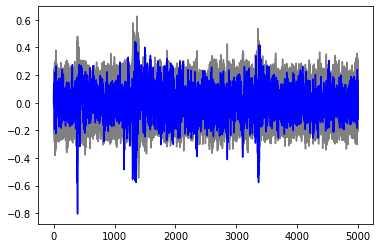

In [8]:
#plot the correlation coefficients for recovering the 3rd nibble, which is equal to 6
plot_corre(corr_coeff, 15)